In [16]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [9]:
preds = pd.read_csv('results/result.csv')
X = pd.read_csv('data/X_test.csv')

X['prediction'] = preds['prediction']

## Find the top 5 most frequent notes from the Review column

In [19]:
rows = []
for cls in sorted(X['prediction'].unique()):
    counter = Counter()
    reviews = X.loc[X['prediction'] == cls, 'review'].dropna()
    for review in reviews:
        notes = [note.strip().lower() for note in review.split(',')]
        counter.update(notes)
    for note, cnt in counter.most_common(5):
        rows.append({'class': cls, 'note': note, 'count': cnt})

top_notes_df = pd.DataFrame(rows)

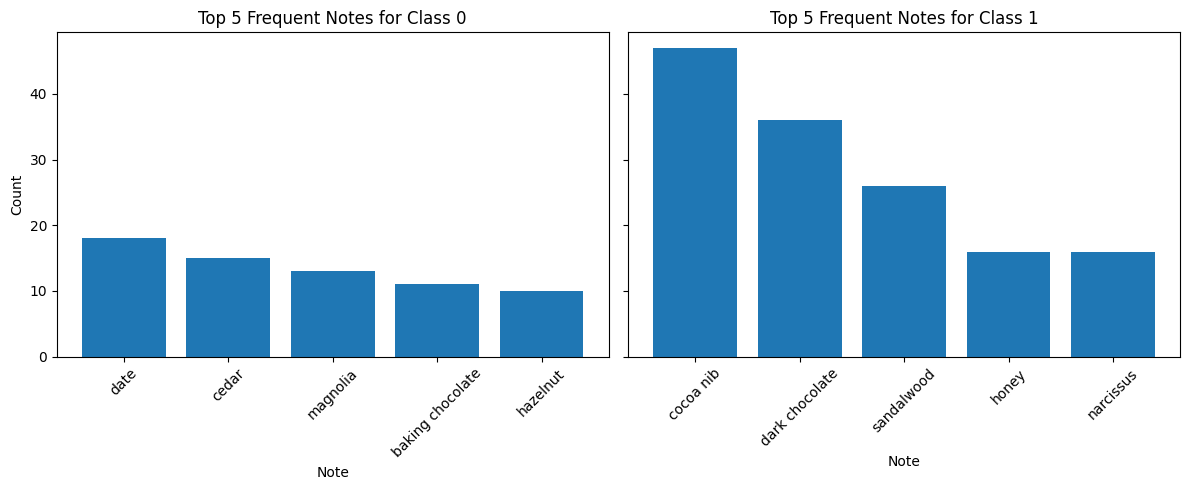

In [20]:
classes = sorted(top_notes_df['class'].unique())
fig, axes = plt.subplots(1, len(classes), figsize=(12, 5), sharey=True)

for ax, cls in zip(axes, classes):
    dfc = top_notes_df[top_notes_df['class'] == cls]
    ax.bar(dfc['note'], dfc['count'])
    ax.set_title(f"Top 5 Frequent Notes for Class {cls}")
    ax.set_xlabel("Note")
    if ax is axes[0]:
        ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()